# Assignment
Here's a generated dataset, with 3 classes and 15 attributes.  
## Goals
* draw correlation heatmap
* reduce data dimension to 2, and then plot 2-D visualization
* reduce data dimension to 3, and then plot 3-D visualization

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [93]:
df_load = pd.read_csv('https://nthu-datalab.github.io/ml/labs/02_EDA_PCA/gen_dataset.csv')
df_load = df_load.sort_values(by = 'Class label')

X = df_load.drop('Class label', axis = 1)
y = df_load['Class label']

In [97]:
print('data的維度', df_load.shape)
print('X的維度', X.shape)
print('y的維度', y.shape)

data的維度 (150, 16)
X的維度 (150, 15)
y的維度 (150,)


## Correlation matrix heatmap
$\hat R =\frac{1}{N}Z^TZ$

In [98]:
# 將資料標準化
sc = StandardScaler()
Z = sc.fit_transform(X)

# 計算correlation matrix
R = np.dot(Z.T, Z) / X.shape[0]

pd.DataFrame(R)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,0.096005,-0.000942,0.055432,-0.003363,-0.088696,-0.093556,0.097335,0.105863,0.041288,-0.084928,0.019864,0.118086,-0.020953,0.018668
1,0.096005,1.000000,0.087564,0.006238,-0.657260,-0.821078,-0.988700,0.850268,0.472279,0.804748,-0.954624,0.205971,0.877962,-0.008553,0.652054
2,-0.000942,0.087564,1.000000,-0.029689,-0.019125,-0.135285,-0.101117,0.134185,0.032186,0.088373,-0.050106,0.119029,0.074667,-0.112603,0.084120
3,0.055432,0.006238,-0.029689,1.000000,-0.058337,-0.127914,-0.043022,0.105679,-0.163105,0.132488,0.055300,0.234343,-0.080530,-0.210222,0.171648
4,-0.003363,-0.657260,-0.019125,-0.058337,1.000000,0.432072,0.659085,-0.397546,0.253452,-0.861067,0.698373,-0.110170,-0.261475,-0.209660,-0.832959
5,-0.088696,-0.821078,-0.135285,-0.127914,0.432072,1.000000,0.892619,-0.994456,-0.237005,-0.817648,0.614225,-0.714403,-0.652393,0.577429,-0.754832
6,-0.093556,-0.988700,-0.101117,-0.043022,0.659085,0.892619,1.000000,-0.909877,-0.388128,-0.860482,0.902778,-0.349347,-0.828230,0.148122,-0.731301
7,0.097335,0.850268,0.134185,0.105679,-0.397546,-0.994456,-0.909877,1.000000,0.337576,0.781175,-0.655672,0.652575,0.724526,-0.529226,0.697163
8,0.105863,0.472279,0.032186,-0.163105,0.253452,-0.237005,-0.388128,0.337576,1.000000,-0.134999,-0.512113,-0.333496,0.836070,0.228868,-0.343129
9,0.041288,0.804748,0.088373,0.132488,-0.861067,-0.817648,-0.860482,0.781175,-0.134999,1.000000,-0.697340,0.539962,0.429715,-0.262115,0.974232


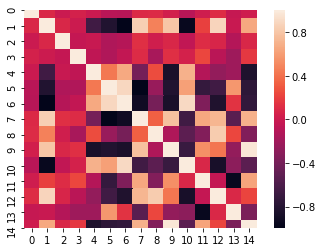

In [29]:
sns.heatmap(
    data = R,
    square = True
)
plt.savefig('./output/fig-assigment-corr.png', dpi = 300)
plt.show()

# PCA
1. 標準化原始資料得到data Z
2. 利用data Z計算correlation matrix $\hat R$
3. 特徵分解$\hat R$得到特徵根與特徵向量
4. 利用特徵根價算可解釋變異比例，選擇合適的K維度
5. 利用選定的K維度，建立projection matrix W
6. 利用matrix W將data Z降為K維

## 計算eigenvalue and eigenvector

In [99]:
eigen_vals, eigen_vecs = np.linalg.eigh(R)
print('eigenvalues \n',eign_vals)

eigenvalues 
 [-9.20501939e-16 -3.25334144e-16 -2.48238062e-16 -2.06286113e-16
  3.35025091e-17  1.09923852e-16  1.70908720e-16  2.49183932e-16
  7.78620847e-16  8.57167886e-01  9.53464088e-01  1.04802339e+00
  1.85367843e+00  3.04250181e+00  7.24516439e+00]


計算variance explained ratio:
$$\frac{|\lambda_j|}{\sum_{j=1}^D|\lambda_j|}$$

In [100]:
total = sum(np.abs(eigen_vals))
var_exp = [(i / total) for i in sorted(np.abs(eigen_vals), reverse = True)]
cum_var_exp = np.cumsum(var_exp)

In [101]:
cum_var_exp

array([0.48301096, 0.68584441, 0.80942298, 0.8792912 , 0.94285547,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

## 視覺化決定K
note: 題目有要求選擇k = 2 or k = 3

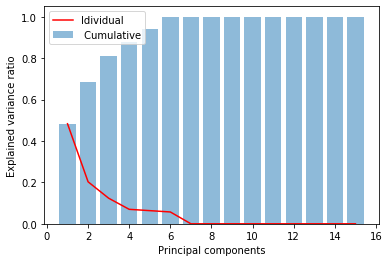

In [102]:
plt.plot(range(1, eigen_vals.size + 1), var_exp, color = 'r', label = 'Idividual')
plt.bar(range(1, eigen_vals.size + 1), cum_var_exp,alpha = 0.5, align = 'center', label = ' Cumulative')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')

plt.savefig('./output/fig-assignment-pca-var-exp.png')
plt.show()

In [103]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse = True)

### k = 2

In [104]:
W_2 =np.vstack((eigen_pairs[0][1],
              eigen_pairs[1][1])).T
print('projection matrix with k = 2\n',W_2)

projection matrix with k = 2
 [[-0.03680108  0.03981019]
 [-0.35344362  0.17546915]
 [-0.04693454 -0.03871644]
 [-0.03537068 -0.19318401]
 [ 0.25184127  0.00295837]
 [ 0.34790093  0.12034321]
 [ 0.36636513 -0.09402419]
 [-0.34839386 -0.0667711 ]
 [-0.09575583  0.44216239]
 [-0.34003746 -0.13435422]
 [ 0.30845714 -0.29936943]
 [-0.18057661 -0.46615457]
 [-0.27367566  0.34020897]
 [ 0.1020755   0.45099414]
 [-0.30387896 -0.247786  ]]


### k = 3

In [105]:
W_3 = np.vstack((
    eigen_pairs[0][1],
    eigen_pairs[1][1],
    eigen_pairs[2][1]
)).T
print('projection matrix with k = 3 \n',W_3)

projection matrix with k = 3 
 [[-3.68010815e-02  3.98101886e-02  1.12149233e-01]
 [-3.53443624e-01  1.75469148e-01 -1.54855864e-02]
 [-4.69345371e-02 -3.87164432e-02  1.15504424e-01]
 [-3.53706763e-02 -1.93184013e-01 -5.02034491e-04]
 [ 2.51841266e-01  2.95837395e-03  5.37399708e-01]
 [ 3.47900935e-01  1.20343211e-01 -2.01164217e-01]
 [ 3.66365130e-01 -9.40241890e-02 -6.92304185e-03]
 [-3.48393864e-01 -6.67711034e-02  2.35753812e-01]
 [-9.57558272e-02  4.42162391e-01  4.19914765e-01]
 [-3.40037462e-01 -1.34354220e-01 -2.38706399e-01]
 [ 3.08457141e-01 -2.99369426e-01  1.38914486e-01]
 [-1.80576614e-01 -4.66154573e-01  2.21961105e-01]
 [-2.73675663e-01  3.40208969e-01  2.31444561e-01]
 [ 1.02075497e-01  4.50994136e-01 -3.97382399e-01]
 [-3.03878959e-01 -2.47786002e-01 -2.74946302e-01]]


Finally, we can obtain the compressed dataset by:
$$Z^{PCA} = ZW $$
and visualize it using:

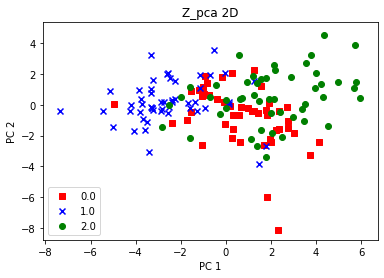

In [123]:
# k = 2
Z_pca_2 = np.dot(Z, W_2)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(y.unique(), colors, markers):
    plt.scatter(Z_pca_2[y == l, 0],
               Z_pca_2[y == l, 1],
               c=c, label = l, marker=m)
plt.title('Z_pca 2D')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

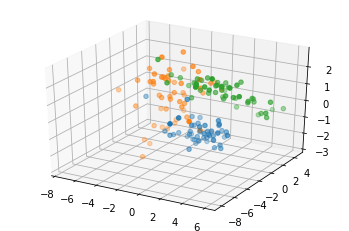

In [133]:
Z_pca_3 = np.dot(Z, W_3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for l, c, m in zip(y.unique(), colors, markers):
    ax.scatter(xs = Z_pca_3[y == l, 0],
               ys = Z_pca_3[y == l, 1],
               zs = Z_pca_3[y == l, 2]
               )

In [118]:
Z_pca_2

array([[ 1.81345569e+00, -6.34960013e-01],
       [ 3.03673110e+00, -1.83254998e+00],
       [ 1.40897765e+00, -5.33331907e-01],
       [-7.48620534e-01,  6.59304793e-01],
       [ 1.68547018e+00, -2.58659416e+00],
       [ 2.55801862e-01,  2.07113944e+00],
       [-8.89050859e-02,  1.66715301e-01],
       [-1.01699937e+00,  1.14655676e+00],
       [ 1.24944636e+00, -4.29229560e-01],
       [ 1.73368902e-01, -9.53871586e-02],
       [ 5.97785728e-01, -6.88157664e-01],
       [ 2.77147167e+00, -1.03211338e+00],
       [ 1.53935816e+00,  1.24664992e+00],
       [-1.55954837e+00,  9.17688204e-01],
       [-1.05506372e+00,  9.83231194e-01],
       [ 3.29424489e-01, -1.53901657e+00],
       [ 2.00827974e+00, -2.43812494e+00],
       [ 3.73001423e+00, -3.24855082e+00],
       [-4.97431590e+00,  4.91717450e-02],
       [ 1.90416047e+00,  1.09626722e-01],
       [ 1.81614474e+00, -5.99870694e+00],
       [ 1.95124219e+00, -2.21000254e+00],
       [-1.07407691e+00, -2.58590479e+00],
       [-2.

In [134]:
Z_pca_3

array([[ 1.81345569e+00, -6.34960013e-01, -1.41267020e+00],
       [ 3.03673110e+00, -1.83254998e+00, -2.99886387e-01],
       [ 1.40897765e+00, -5.33331907e-01, -1.48048523e+00],
       [-7.48620534e-01,  6.59304793e-01, -1.38016197e+00],
       [ 1.68547018e+00, -2.58659416e+00, -4.52491610e-01],
       [ 2.55801862e-01,  2.07113944e+00, -2.47408239e+00],
       [-8.89050859e-02,  1.66715301e-01, -1.07318069e+00],
       [-1.01699937e+00,  1.14655676e+00, -2.41876020e+00],
       [ 1.24944636e+00, -4.29229560e-01, -1.45377064e+00],
       [ 1.73368902e-01, -9.53871586e-02, -2.04496177e+00],
       [ 5.97785728e-01, -6.88157664e-01, -1.31218630e+00],
       [ 2.77147167e+00, -1.03211338e+00, -1.97848905e+00],
       [ 1.53935816e+00,  1.24664992e+00, -1.56396713e+00],
       [-1.55954837e+00,  9.17688204e-01, -2.23445955e+00],
       [-1.05506372e+00,  9.83231194e-01, -2.36032631e+00],
       [ 3.29424489e-01, -1.53901657e+00, -7.58343291e-01],
       [ 2.00827974e+00, -2.43812494e+00